In [1]:
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ozone_data = '/shared/netscratch/nla27/ACSIS/flights/ATom1/ncdf/m01s34i001_bb901.nc'
fh = nc.Dataset(ozone_data)

In [3]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    source: Data from Met Office Unified Model
    um_version: 10.6
    Conventions: CF-1.5
    dimensions(sizes): time(623), model_level_number(35), latitude(144), longitude(192), bnds(2)
    variables(dimensions): float32 mass_fraction_of_ozone_in_air(time,model_level_number,latitude,longitude), int32 latitude_longitude(), float64 time(time), int32 model_level_number(model_level_number), float32 latitude(latitude), float32 longitude(longitude), float64 forecast_period(time), float64 forecast_reference_time(), float32 level_height(model_level_number), float32 level_height_bnds(model_level_number,bnds), float32 sigma(model_level_number), float32 sigma_bnds(model_level_number,bnds)
    groups: 



In [4]:
lats = fh.variables['latitude'][:]
lons = fh.variables['longitude'][:]
t = fh.variables['time']
mln = fh.variables['model_level_number']
ozone = fh.variables['mass_fraction_of_ozone_in_air']
print(mln)

<class 'netCDF4._netCDF4.Variable'>
int32 model_level_number(model_level_number)
    axis: Z
    units: 1
    standard_name: model_level_number
    positive: up
unlimited dimensions: 
current shape = (35,)
filling on, default _FillValue of -2147483647 used



In [5]:
print(t)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    units: hours since 1970-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (623,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [6]:
from mpl_toolkits.basemap import Basemap, shiftgrid

In [7]:
print(lats)
print(lons)

[-89.375 -88.125 -86.875 -85.625 -84.375 -83.125 -81.875 -80.625 -79.375
 -78.125 -76.875 -75.625 -74.375 -73.125 -71.875 -70.625 -69.375 -68.125
 -66.875 -65.625 -64.375 -63.125 -61.875 -60.625 -59.375 -58.125 -56.875
 -55.625 -54.375 -53.125 -51.875 -50.625 -49.375 -48.125 -46.875 -45.625
 -44.375 -43.125 -41.875 -40.625 -39.375 -38.125 -36.875 -35.625 -34.375
 -33.125 -31.875 -30.625 -29.375 -28.125 -26.875 -25.625 -24.375 -23.125
 -21.875 -20.625 -19.375 -18.125 -16.875 -15.625 -14.375 -13.125 -11.875
 -10.625  -9.375  -8.125  -6.875  -5.625  -4.375  -3.125  -1.875  -0.625
   0.625   1.875   3.125   4.375   5.625   6.875   8.125   9.375  10.625
  11.875  13.125  14.375  15.625  16.875  18.125  19.375  20.625  21.875
  23.125  24.375  25.625  26.875  28.125  29.375  30.625  31.875  33.125
  34.375  35.625  36.875  38.125  39.375  40.625  41.875  43.125  44.375
  45.625  46.875  48.125  49.375  50.625  51.875  53.125  54.375  55.625
  56.875  58.125  59.375  60.625  61.875  63.125  6

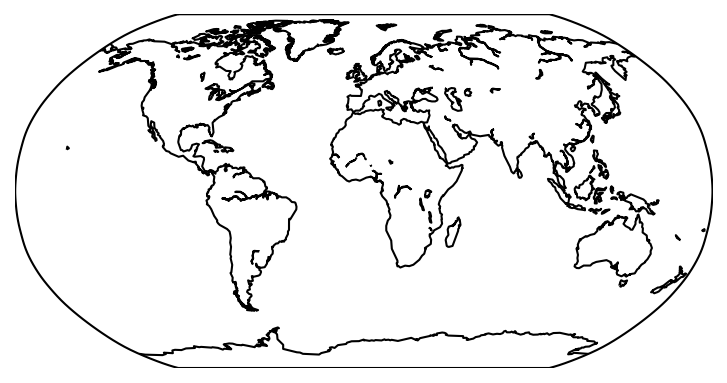

In [8]:
#make world map plot
plt.figure(dpi=150)
map = Basemap(projection='robin', lon_0=0.) #lon_0 - central longitude of projection; resolution = c means using crude resolution baselines; robin = the Robinson projection
map.drawcoastlines()


### time averaged?

In [9]:
o3_cyclic, lons_cyclic = shiftgrid(180.9375, ozone[:], lons, start=False)

In [10]:
def addcyclic(arrin, lonsin):
    arrslice = arrin[..., -1]
    

In [11]:
ozone[...,-1]

masked_array(
  data=[[[3.86843837e-08, 3.87590049e-08, 3.94356903e-08, ...,
          3.62939296e-08, 4.25541096e-08, 4.61657663e-08],
         [4.08092795e-08, 4.07997618e-08, 4.14989145e-08, ...,
          3.64735371e-08, 4.25942375e-08, 4.62072762e-08],
         [4.10639593e-08, 4.08396126e-08, 4.15759303e-08, ...,
          3.73894480e-08, 4.26264215e-08, 4.63405883e-08],
         ...,
         [8.96912837e-08, 1.07241178e-07, 1.28711903e-07, ...,
          2.03019951e-07, 2.01168859e-07, 1.90767707e-07],
         [1.25568548e-07, 1.07007622e-07, 1.56756670e-07, ...,
          2.45057834e-07, 2.40218213e-07, 2.25756025e-07],
         [1.92736366e-07, 1.08508864e-07, 1.72371301e-07, ...,
          3.06207312e-07, 2.94842380e-07, 2.74795696e-07]],

        [[3.84341838e-08, 3.87012875e-08, 3.94437016e-08, ...,
          3.85721357e-08, 4.29567848e-08, 4.70287773e-08],
         [4.05567064e-08, 4.07392342e-08, 4.15103933e-08, ...,
          3.86376122e-08, 4.30796412e-08, 4.70167016e

In [12]:
o3_cyclic_column = np.sum(o3_cyclic,axis = 1)

In [13]:
#o3_cyclic_timeavg = np.sum(o3_cyclic,axis = 0)/629
#not sure if this is correct

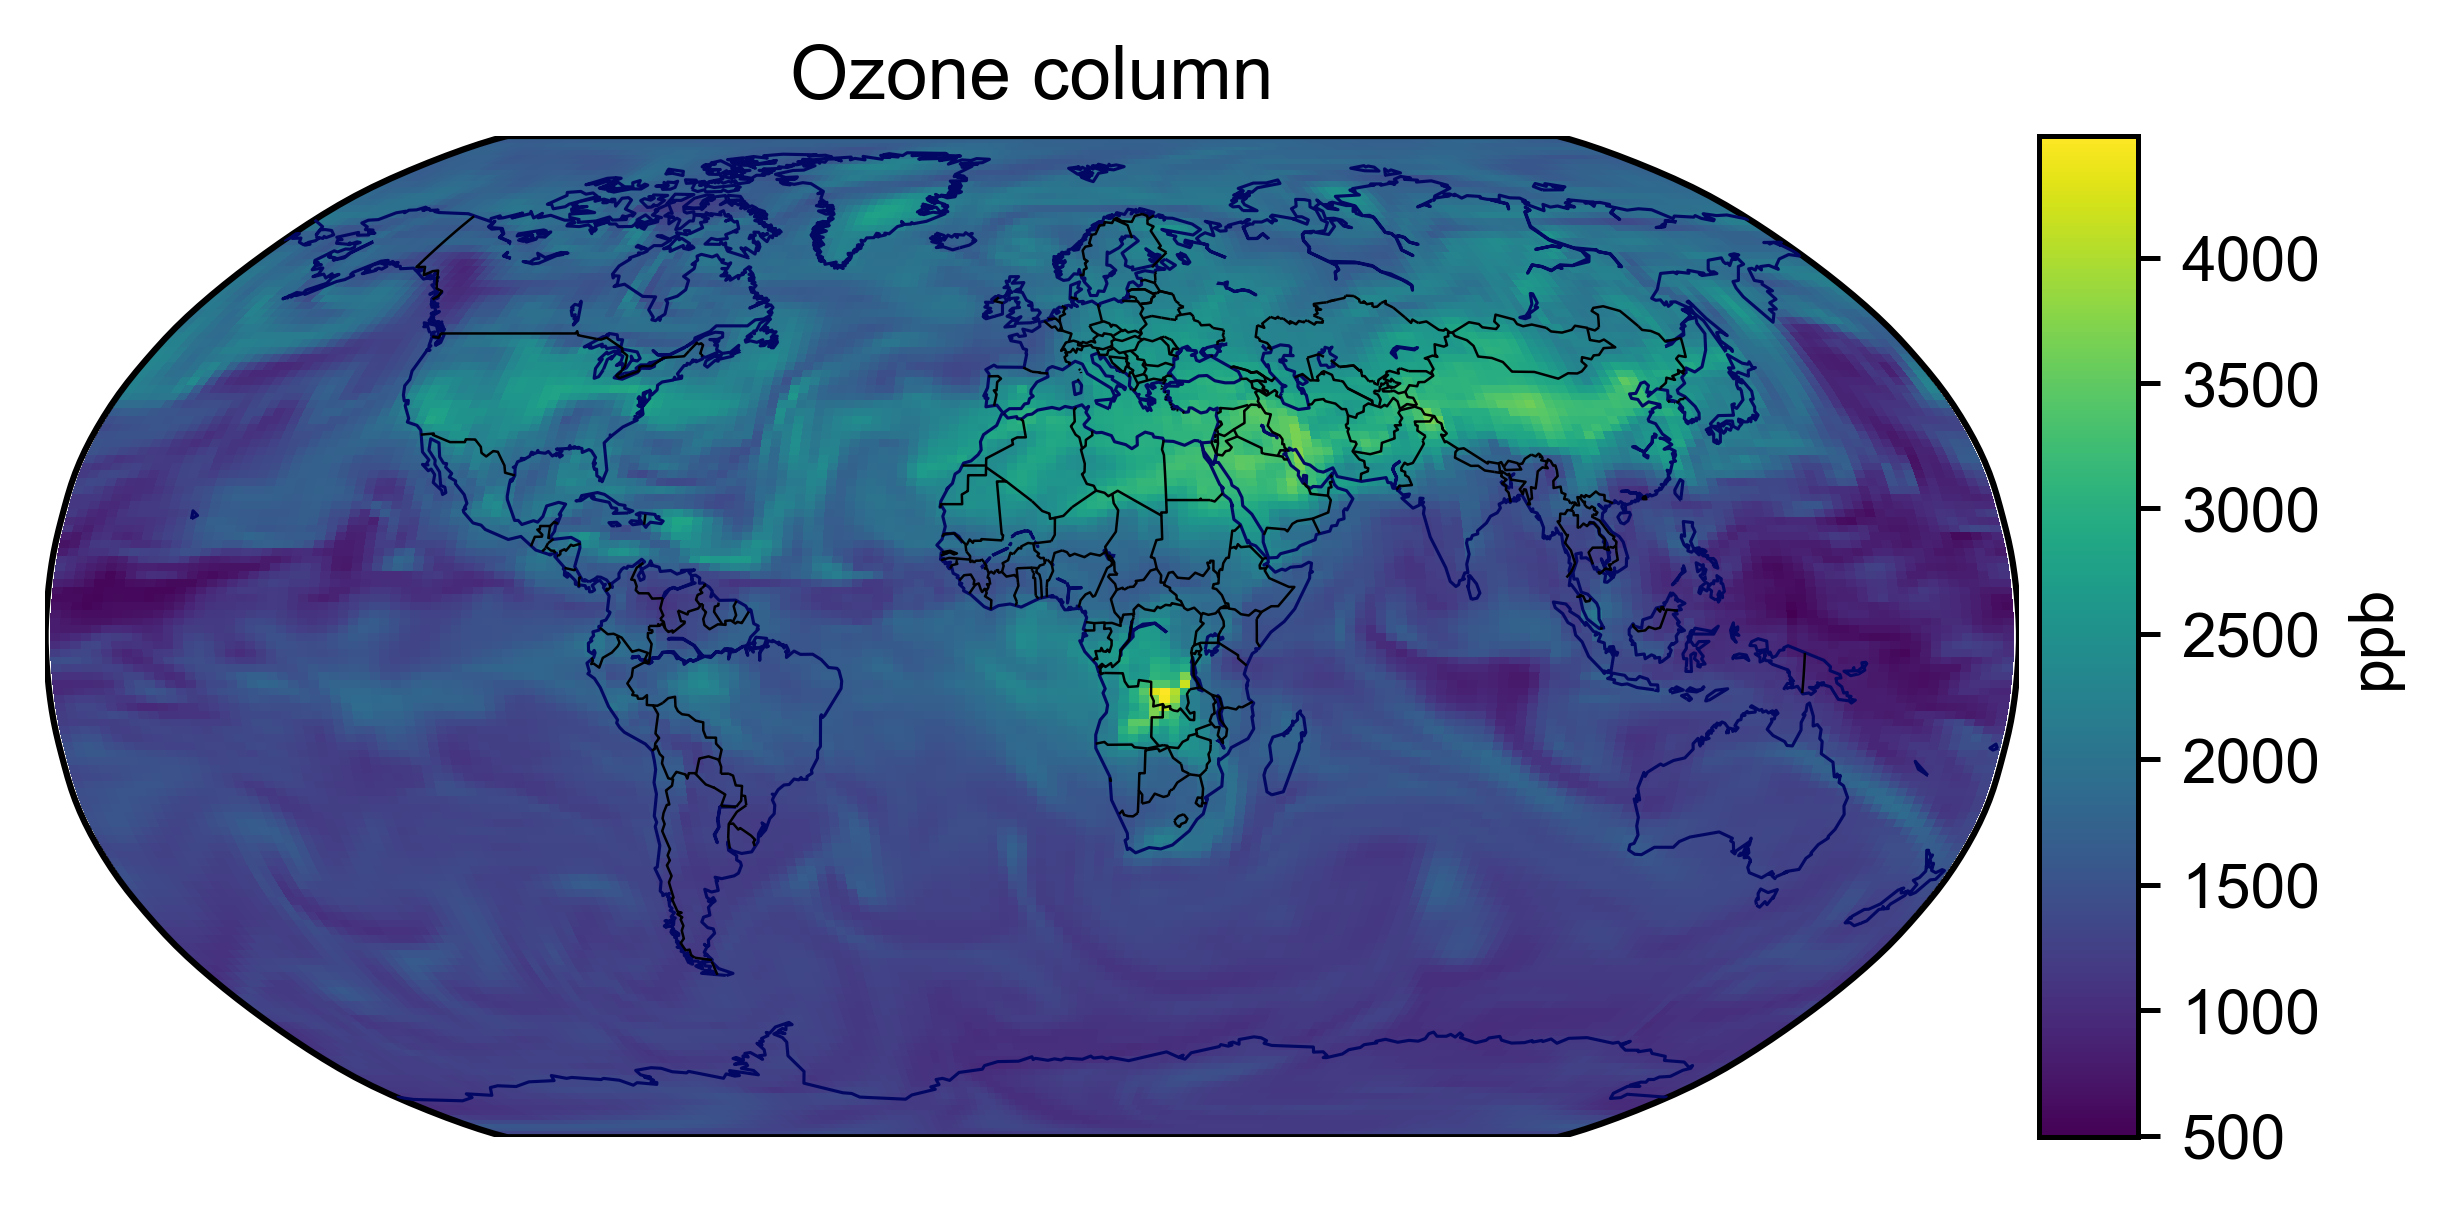

In [16]:
plt.figure(dpi=450)

    #set font name
plt.rcParams["font.family"] = "Arial"

    #add title
plt.title('Ozone column', fontsize=12)
map = Basemap(projection='robin', lon_0 = 0.) # llcrnrlon, llcrnrlat, urcrnrlon and urcrnrlat to restrict the domains#                                            # projection, lat/lon extents and resolution of polygons to draw
                                            # resolutions: c - crude, l - low, i - intermediate, h - high, f - full
#map = Basemap()
    #draw map scale      
map.drawcoastlines(linewidth = 0.5, color = 'xkcd:darkblue')
    #map.drawstates(linewidth=0.8)
    #map.drawcountries(color ='r')
    #map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
map.drawcountries(color = 'black', linewidth = 0.4)

    #(lons-360.,lats) this dataset lon is 0 through 360, probably to substract 180 under other projections?
lon,lat = np.meshgrid(lons_cyclic,lats)
xi,yi = map(lon,lat)

cs = map.pcolormesh(xi,yi,o3_cyclic_column[0,:,:]*28.97e9/48)#, latlon=True)

cbar = map.colorbar(cs, location='right', size='5%', pad = '1%')
cbar.set_label('ppb')

plt.show()

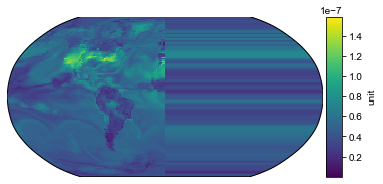

In [12]:
lon,lat = np.meshgrid(lons,lats)
xi,yi = map(lon,lat)

cs = map.pcolormesh(xi,yi,ozone[0,0,:,:])

cbar = map.colorbar(cs, location='right', size='5%', pad = '1%')
cbar.set_label('unit')

plt.show()

In [1]:
>>> import matplotlib.pyplot as plt
>>> x = np.arange(-5, 5, 0.1)
>>> y = np.arange(-5, 5, 0.1)
>>> xx, yy = np.meshgrid(x, y, sparse=True)
>>> z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
>>> h = plt.contourf(x,y,z)
>>> plt.show()

NameError: name 'np' is not defined